In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(channel="ibm_quantum", token="96e25b5c2309188afbe04861afa9b0bf37e560d0d3c0c3461a1db2840fc82d37e8203104538aaff0a6eaf48f801baa899c039397341d6ba886b5efbb91b1987e")
 

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="96e25b5c2309188afbe04861afa9b0bf37e560d0d3c0c3461a1db2840fc82d37e8203104538aaff0a6eaf48f801baa899c039397341d6ba886b5efbb91b1987e", set_as_default=True,overwrite=True)
 
# Load saved credentials
service = QiskitRuntimeService()

In [66]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

 
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

p_error = 0.20


bit_flip1 = pauli_error([('X', p_error), ('I', 1 - p_error)])
bit_flip = bit_flip1.tensor(bit_flip1)

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(bit_flip, ['cx','cz'])
noise_model.add_all_qubit_quantum_error(bit_flip1, ['h'])
print(noise_model)







NoiseModel:
  Basis gates: ['cx', 'cz', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['cz', 'cx', 'h']
  All-qubits errors: ['cx', 'cz', 'h']


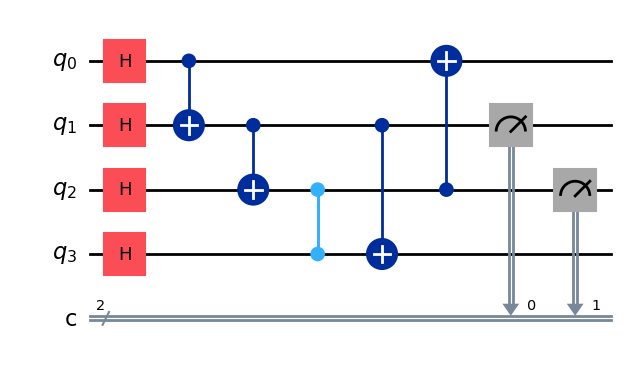

In [93]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(4,'q')
cr = ClassicalRegister(2,'c')
qc = QuantumCircuit(qr, cr)

qc.h(qr[i] for i in range(4))
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[2])
qc.cz(qr[2], qr[3])
qc.cx(qr[1], qr[3])
qc.cx(qr[2], qr[0])
qc1 = qc
qc.measure(qr[1], cr[0])
qc.measure(qr[2], cr[1])

qc.draw('mpl')


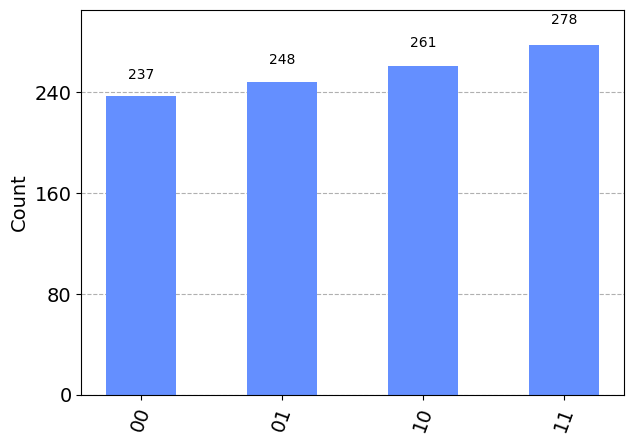

In [70]:
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(qc).result()
plot_histogram(result_ideal.get_counts(0))

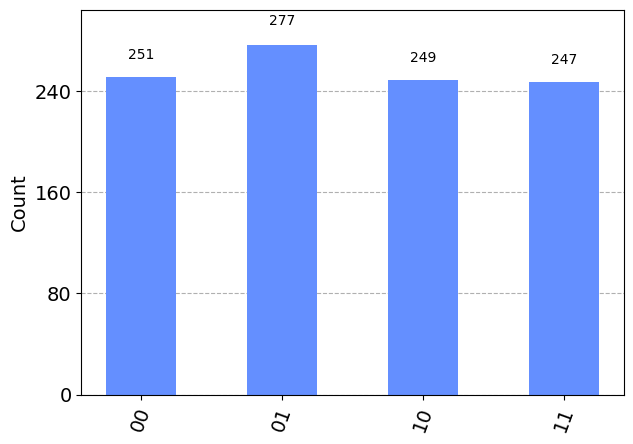

In [71]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)
 
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_noise)
circ_tnoise = passmanager.run(qc)
 
# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)
 
# Plot noisy output
plot_histogram(counts_bit_flip)

In [80]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService()
backend = service.backend("simulator_statevector")
sampler = Sampler(backend)
job = sampler.run([qc])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

c:\Users\larai\miniconda3\envs\QUANTUM\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:879: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


job id: covjv7odhl432tqi33a0
PrimitiveResult([PubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})


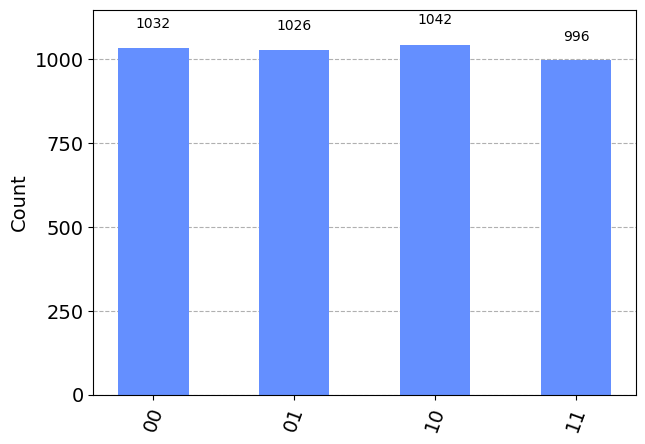

In [87]:

#simulator_statevector
job = service.job('covjv7odhl432tqi33a0')
job_result = job.result()

pub_result = job_result[0].data.c.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register. 
# You can use circuit.cregs to find the name of the classical registers.

plot_histogram(pub_result)

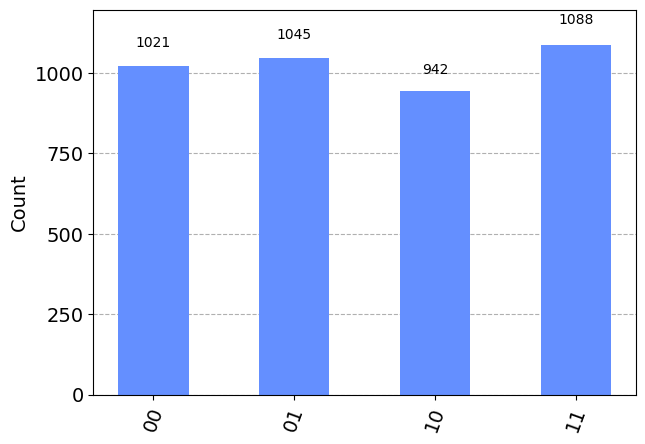

In [88]:
#ibmq_qasm_simulator
job = service.job('covjqk62d8gpd3e7nbmg')
job_result = job.result()

pub_result = job_result[0].data.c.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register. 
# You can use circuit.cregs to find the name of the classical registers.

plot_histogram(pub_result)

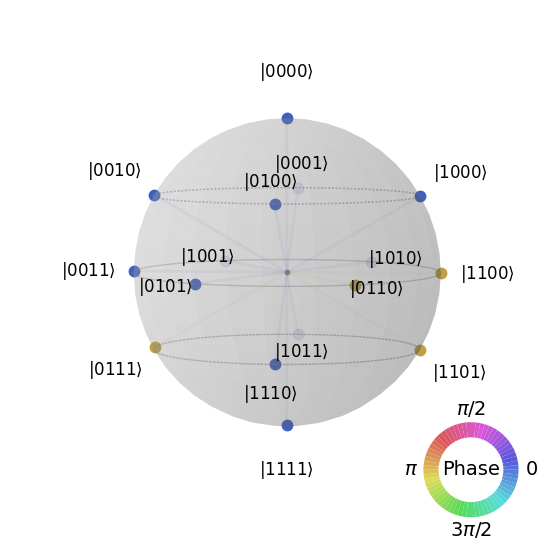

In [1]:
from numpy import sqrt
from qiskit.quantum_info import Statevector
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(4,'q')
cr = ClassicalRegister(2,'c')
qc1 = QuantumCircuit(qr, cr)

qc1.h(qr[i] for i in range(4))
qc1.cx(qr[0], qr[1])
qc1.cx(qr[1], qr[2])
qc1.cz(qr[2], qr[3])
qc1.cx(qr[1], qr[3])
qc1.cx(qr[2], qr[0])
sv=Statevector(qc1)
sv.draw(output='qsphere')

In [2]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex

In [21]:
p0 = qi.Statevector(sv)
p0.draw('latex')

<IPython.core.display.Latex object>

In [22]:
p1 = p0.evolve(qc1)
q1 = qi.DensityMatrix(p1)


In [23]:
q1


DensityMatrix([[ 2.50000000e-01+0.j, -2.48301437e-35-0.j,
                -2.50000000e-01-0.j, -2.48301437e-35-0.j,
                 2.48301437e-35+0.j,  2.50000000e-01+0.j,
                 2.48301437e-35+0.j, -2.50000000e-01-0.j,
                -2.22546982e-18-0.j,  2.38105196e-18+0.j,
                 2.22546982e-18+0.j,  2.38105196e-18+0.j,
                 2.38105196e-18+0.j,  2.22546982e-18+0.j,
                 2.38105196e-18+0.j, -2.22546982e-18-0.j],
               [-2.48301437e-35+0.j,  2.46614414e-69+0.j,
                 2.48301437e-35+0.j,  2.46614414e-69+0.j,
                -2.46614414e-69+0.j, -2.48301437e-35+0.j,
                -2.46614414e-69+0.j,  2.48301437e-35+0.j,
                 2.21034942e-52+0.j, -2.36487449e-52+0.j,
                -2.21034942e-52+0.j, -2.36487449e-52+0.j,
                -2.36487449e-52+0.j, -2.21034942e-52+0.j,
                -2.36487449e-52+0.j,  2.21034942e-52+0.j],
               [-2.50000000e-01+0.j,  2.48301437e-35+0.j,
            

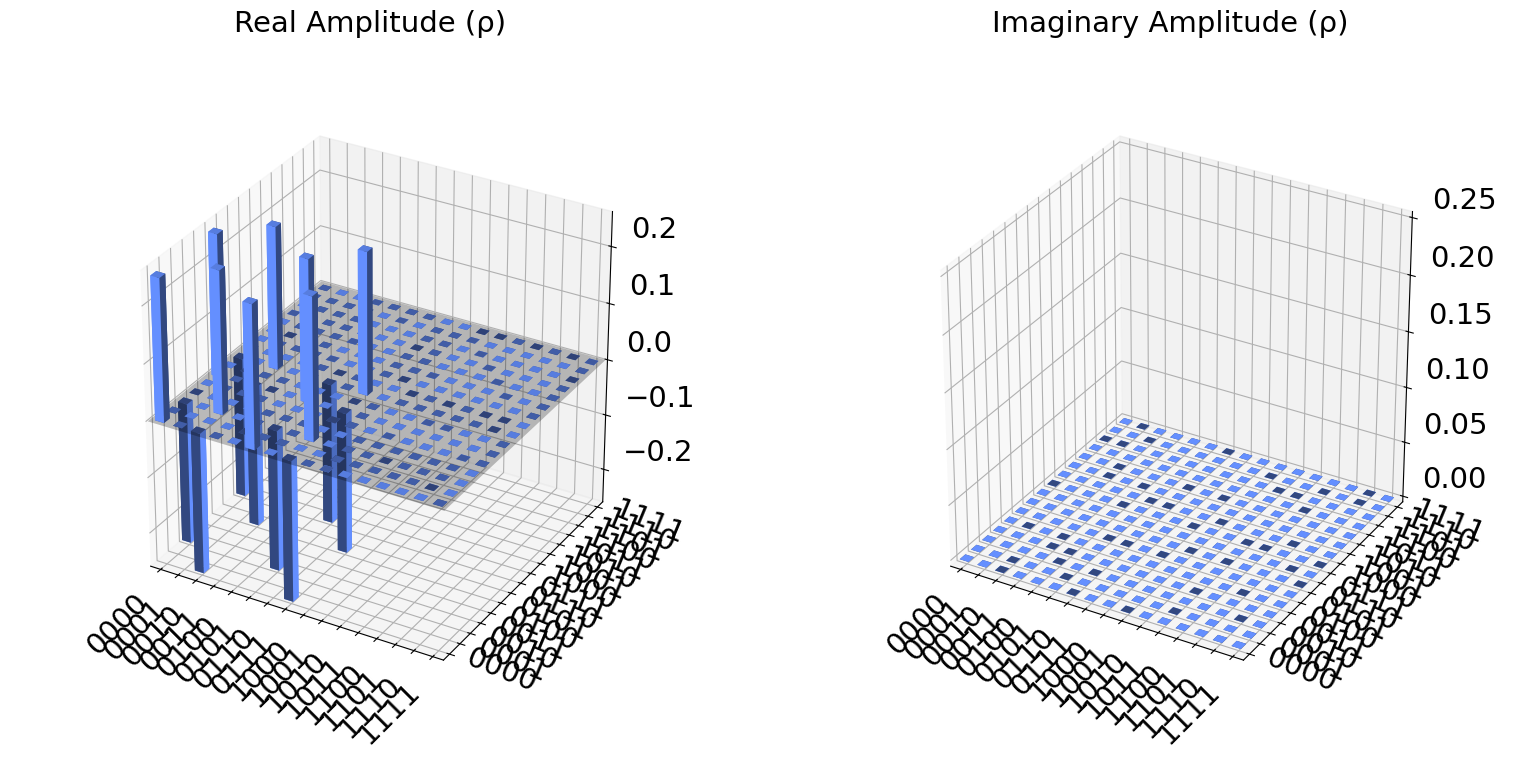

In [26]:
q1.draw('city')

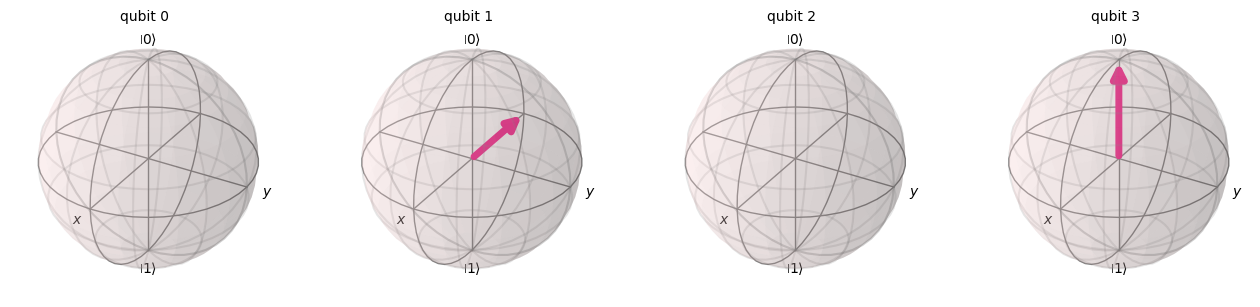

In [25]:
q1.draw('bloch')